In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/NeethaJorrigala/Downloads/DoctorVisits - DA.csv.crdownload")
data.shape
data.head(15)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


In [6]:
data.info()2no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [7]:
gender_counts = data['gender'].value_counts()
print(gender_counts)

female    2702
male      2488
Name: gender, dtype: int64


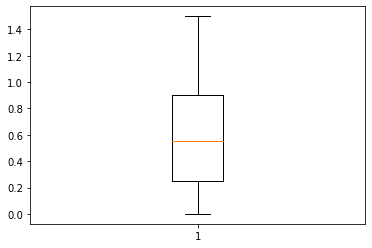

In [8]:
data['illness'].value_counts()
data['gender'].value_counts()
y = list(data.income)
plt.boxplot(y)
plt.show()

<Figure size 720x720 with 0 Axes>

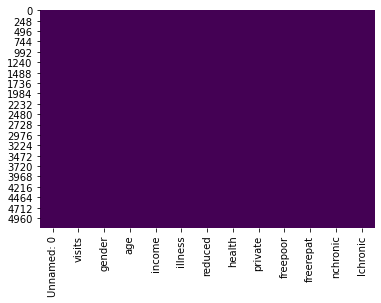

<Figure size 720x720 with 0 Axes>

In [15]:
data.groupby(['gender','reduced']).mean()
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

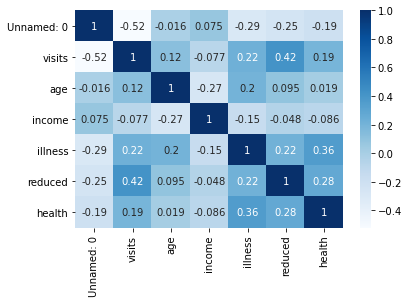

<Figure size 720x720 with 0 Axes>

In [11]:
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')
plt.figure(figsize=(10,10))


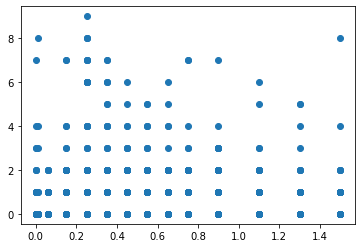

In [12]:
plt.scatter(x='income',y='visits',data=data)

<AxesSubplot:xlabel='INCOME', ylabel='VISITS'>

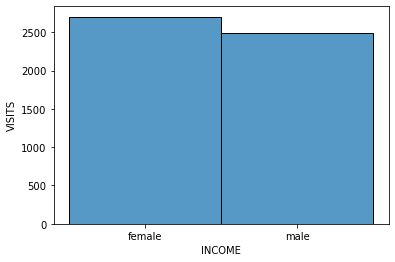

In [16]:
plt.xlabel('INCOME')
plt.ylabel('VISITS')
sns.histplot(data.gender,bins=2)

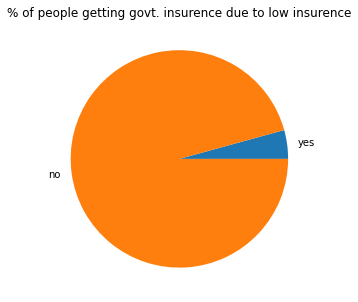

In [17]:
label=['yes','no']
Y = data[data['freepoor']=='yes']
N = data[data['freepoor']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels = label)
plt.title("% of people getting govt. insurence due to low insurence")
plt.show()

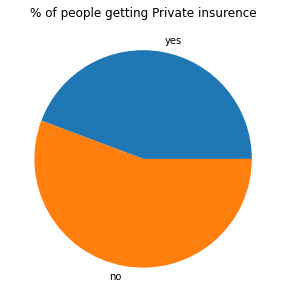

In [18]:
Y = data[data['private']=='yes']
N = data[data['private']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels = label)
plt.title("% of people getting Private insurence")
plt.show()

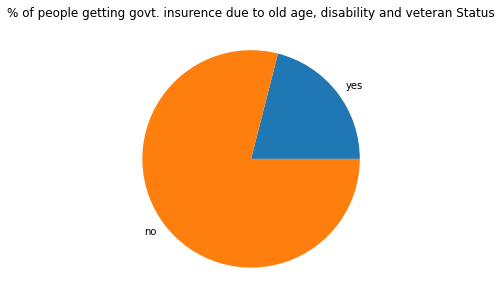

In [19]:
Y = data[data['freerepat']=='yes']
N = data[data['freerepat']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels = label)
plt.title("% of people getting govt. insurence due to old age, disability and veteran Status")
plt.show()

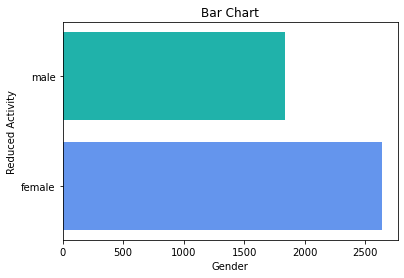

In [20]:
db= data.groupby("gender")['reduced'].sum().to_frame().reset_index()
plt.barh(db['gender'], db['reduced' ], color = ['cornflowerblue', 'lightseagreen'])
plt.title('Bar Chart')
plt.xlabel('Gender')
plt.ylabel('Reduced Activity')
plt.show()

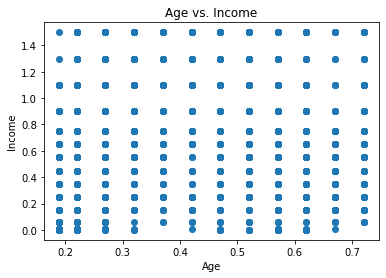

In [21]:
plt.scatter(data['age'], data['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income')
plt.show()

In [24]:
# Average number of days of reduced activity by gender and illness
average_reduced_activity_by_gender_and_illness = data.groupby(['gender', 'illness'])['reduced'].mean()
print(average_reduced_activity_by_gender_and_illness)

gender  illness
female  0          0.042710
        1          1.083933
        2          1.015066
        3          1.246246
        4          1.928144
        5          2.702532
male    0          0.057143
        1          0.781095
        2          1.067470
        3          1.511962
        4          1.710280
        5          2.782051
Name: reduced, dtype: float64


In [29]:
# Percentage of people who have been to the hospital in the past year by gender and income status
percentage_of_people = data.groupby(['gender', 'income'])['visits'].apply(lambda x: (x == 0).mean())
print(percentage_of_people)

gender  income
female  0.00      0.800000
        0.01      0.789474
        0.06      0.853659
        0.15      0.731034
        0.25      0.697917
        0.35      0.747331
        0.45      0.744395
        0.55      0.796748
        0.65      0.811404
        0.75      0.807910
        0.90      0.801802
        1.10      0.833333
        1.30      0.734694
        1.50      0.795918
male    0.00      0.896552
        0.01      0.937500
        0.06      0.846154
        0.15      0.855769
        0.25      0.773414
        0.35      0.834254
        0.45      0.836158
        0.55      0.864253
        0.65      0.814978
        0.75      0.844697
        0.90      0.885559
        1.10      0.893281
        1.30      0.867257
        1.50      0.801205
Name: visits, dtype: float64
